# Seattle Public Library Checkouts 2022

This project analyzes and visualizes the Checkouts by Title dataset. The dataset can be found in the link below. The dataset has been queried to only contain information from 2022.

Dataset: https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Import Dataset

In [2]:
df = pd.read_csv("Checkouts_by_Title_2022.csv", dtype = {"ISBN" : "str"})
df.head()

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,ISBN,Creator,Subjects,Publisher,PublicationYear
0,Physical,Horizon,BOOK,2022,9,6,Great day for up! Pictures by Quentin Blake.,"0394829131, 0394929136","Seuss, Dr.",Stories in rhyme,"Beginner Books,",[1974]
1,Digital,OverDrive,AUDIOBOOK,2022,9,1,The Scientist and the Spy: A True Story of Chi...,9780593166819,Mara Hvistendahl,"Business, Politics, True Crime, Nonfiction",Books on Tape,2020
2,Digital,OverDrive,EBOOK,2022,9,3,The Flame and the Flower,9780061743696,Kathleen E. Woodiwiss,"Fiction, Romance, Historical Fiction",HarperCollins Publishers Inc.,2006
3,Digital,OverDrive,EBOOK,2022,9,8,Fifty Words for Rain: A Novel,9781524746377,Asha Lemmie,"Fiction, Literature, Historical Fiction","Penguin Group (USA), Inc.",2020
4,Physical,Horizon,BOOK,2022,9,5,How to code a rollercoaster / by Josh Funk ; i...,"0425292037, 9780425292037","Funk, Josh","Amusement parks Juvenile fiction, Computer pro...","Viking,",[2019]


## Visualizations

### UsageClass

In [3]:
#Create a new dataframe
usuage_df = df[["UsageClass","Checkouts"]]

In [4]:
#Group checkouts by the usage class
usuage_df.groupby("UsageClass")["Checkouts"].sum()

UsageClass
Digital     4692195
Physical    3710181
Name: Checkouts, dtype: int64

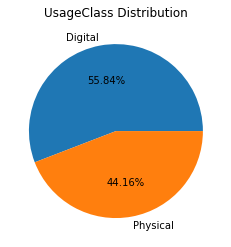

In [5]:
#Visualize the results
usuage_df.groupby("UsageClass")["Checkouts"].sum().plot.pie(autopct = "%1.2f%%")
plt.title("UsageClass Distribution")
plt.ylabel("");

### MaterialType

In [6]:
#Create a smaller dataframe
material_type_df = df[["MaterialType","Checkouts"]]

In [7]:
#Group the dataframe by checkouts and sort the values
materials_grouped = material_type_df.groupby("MaterialType")["Checkouts"].sum()
materials_grouped = materials_grouped.sort_values(ascending = False)

In [8]:
#Display the top 5 values
materials_grouped[0:5]

MaterialType
BOOK         2877911
EBOOK        2736499
AUDIOBOOK    1954869
VIDEODISC     573191
SOUNDDISC     185864
Name: Checkouts, dtype: int64

In [9]:
#Display the remaining values within the dataframe
materials_grouped[4::].sort_values(ascending = False)

MaterialType
SOUNDDISC                                     185864
MIXED                                          30402
REGPRINT                                       25723
MUSIC                                           4249
LARGEPRINT                                      3787
ER, SOUNDREC                                    1784
SOUNDDISC, VIDEODISC                            1583
CR                                              1080
ER                                               929
SOUNDREC                                         840
VIDEO                                            827
MAP                                              521
ATLAS                                            499
VISUAL                                           488
ER, VIDEODISC                                    403
ER, SOUNDDISC                                    317
UNSPECIFIED                                      316
REGPRINT, VIDEOREC                                37
ER, SOUNDDISC, SOUNDREC          

In [10]:
#Sum up all the checkouts below video disc and create a new index value
materials_grouped["OTHER"] = materials_grouped[4::].sum()

In [11]:
#Display the top 5 values
materials_grouped.sort_values(ascending = False)[0:5]

MaterialType
BOOK         2877911
EBOOK        2736499
AUDIOBOOK    1954869
VIDEODISC     573191
OTHER         259906
Name: Checkouts, dtype: int64

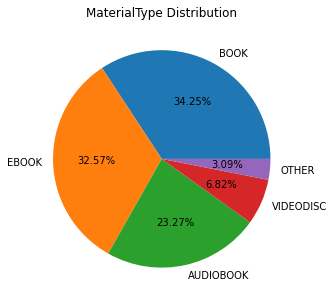

In [12]:
#Visualize the results
plt.figure(figsize = (12,5))
materials_grouped.sort_values(ascending = False)[0:5].plot.pie(autopct = "%1.2f%%")
plt.title("MaterialType Distribution")
plt.ylabel("");

### Subjects

In [13]:
#Create a smaller dataframe
subjects_df = df[["Checkouts","Subjects"]]
subjects_df.head()

,Checkouts,Subjects
0,6,Stories in rhyme
1,1,"Business, Politics, True Crime, Nonfiction"
2,3,"Fiction, Romance, Historical Fiction"
3,8,"Fiction, Literature, Historical Fiction"
4,5,"Amusement parks Juvenile fiction, Computer pro..."


In [14]:
#Check for missing values
subjects_df.isna().sum()

Checkouts        0
Subjects     13496
dtype: int64

In [15]:
#Drop missing values
subjects_df = subjects_df.dropna()
subjects_df.isna().sum()

Checkouts    0
Subjects     0
dtype: int64

In [16]:
#Create a function to seperate and count each subject from the Subjects column
#Multiply each subject by their number of checkouts
subject_count = {}
for i in range(len(subjects_df)):
    subjects = subjects_df["Subjects"].iloc[i].split(",")
    checkout_value = int(subjects_df["Checkouts"].iloc[i])
    for j in range(len(subjects)):
        subject = subjects[j].strip()
        if subject not in subject_count:
            subject_count.setdefault(subject, checkout_value)
        else:
            subject_count[subject] += checkout_value

In [17]:
#Create a dataframe to help display the results
subject_count_df = pd.DataFrame(subject_count.items(), columns = ["Subjects","Count"])
subject_count_df.sort_values("Count", ascending = False).head(10)

,Subjects,Count
5,Fiction,2585991
4,Nonfiction,1393472
8,Literature,1221087
6,Romance,681127
18,Thriller,656815
29,Mystery,620866
27,Fantasy,603038
7,Historical Fiction,527458
190,Video recordings for the hearing impaired,472557
15,Juvenile Fiction,440443


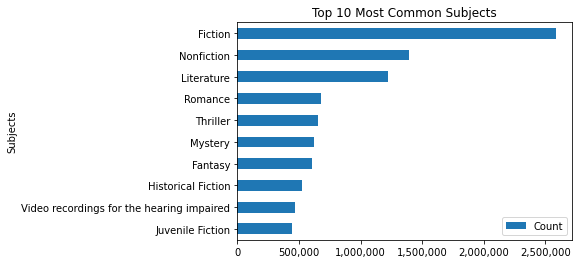

In [18]:
#Visualize the results
subjects_plot = subject_count_df.sort_values("Count").tail(10)
subjects_plot.plot(x = "Subjects", y = "Count", kind = "barh")
plt.title("Top 10 Most Common Subjects")
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'));

### Checkouts by Month

In [19]:
#Create a smaller dataframe
dates_df = df[["CheckoutMonth", "Checkouts"]]
dates_df.head()

,CheckoutMonth,Checkouts
0,9,6
1,9,1
2,9,3
3,9,8
4,9,5


In [20]:
#Group the checkout values by month
checkout_by_dates = dates_df.groupby(["CheckoutMonth"])["Checkouts"].sum()

In [21]:
#Create a new dataframe to house the results
checkout_by_dates_df = pd.DataFrame(checkout_by_dates)
checkout_by_dates_df

,Checkouts
CheckoutMonth,
1,739681
2,637979
3,705330
4,644617
5,701259
6,707177
7,706206
8,744873
9,701731


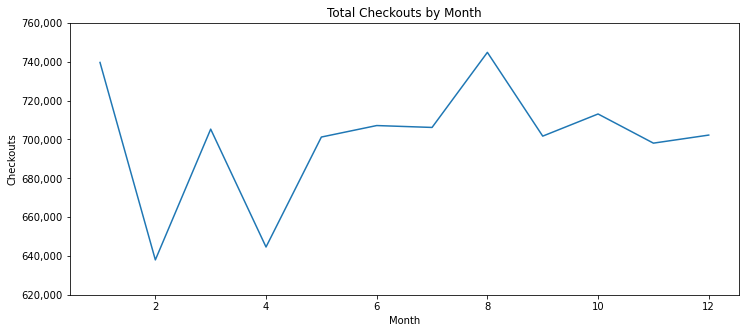

In [22]:
#Visualize the results
x = checkout_by_dates_df.index
y = checkout_by_dates_df["Checkouts"]

plt.figure(figsize = (12,5))
plt.ylim(620000,760000)
plt.title("Total Checkouts by Month")
plt.xlabel("Month")
plt.ylabel("Checkouts")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.plot(x,y);

### Most Popular Products

In [23]:
#Create a smaller dataframe
products_df = df[["Title","Checkouts"]]

In [24]:
#Group the products by checkouts
popular_products = products_df.groupby(["Title"])["Checkouts"].sum()

In [25]:
#View the results
popular_products_df = pd.DataFrame(popular_products)
popular_products_df.sort_values("Checkouts", ascending = False).head()

,Checkouts
Title,
Headphones / Seattle Public Library.,19040
SPL HotSpot : connecting Seattle / [distributed by T-Mobile].,8110
"Braiding Sweetgrass: Indigenous Wisdom, Scientific Knowledge and the Teachings of Plants (unabridged)",6198
The House of Broken Angels,5257
Cloud Cuckoo Land: A Novel,5132


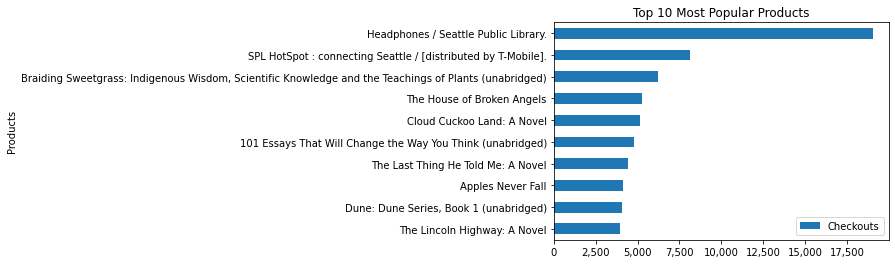

In [26]:
#Visualize the results
products_plot = popular_products_df.sort_values("Checkouts").tail(10)
products_plot.plot(kind = "barh")
plt.title("Top 10 Most Popular Products")
plt.ylabel("Products")
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'));